Read CSV to R Data Frame

In [1]:
college <- read.csv("college.csv")
rownames(college) <- college[, "X"]
college <- college[, -1]

In [2]:
head(college)

,Private,Apps,Accept,Enroll,Top10perc,F.Undergrad,P.Undergrad,Outstate,PhD,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,2885,537,7440,70,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,2683,1227,12280,29,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,1036,99,11250,53,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,510,63,12960,92,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,249,869,7560,76,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,678,41,13500,67,9.4,11,9727,55


Create New Variable

In [3]:
college$PercentAccept <- college$Accept/college$Apps
college$PercentEnroll <- college$Enroll/college$Accept

In [4]:
college <- subset(college, select = -c(Apps, Accept, Enroll))

In [5]:
head(college,2)

,Private,Top10perc,F.Undergrad,P.Undergrad,Outstate,PhD,S.F.Ratio,perc.alumni,Expend,Grad.Rate,PercentAccept,PercentEnroll
Abilene Christian University,Yes,23,2885,537,7440,70,18.1,12,7041,60,0.7421687,0.5852273
Adelphi University,Yes,16,2683,1227,12280,29,12.2,16,10527,56,0.8801464,0.2661123


Standardize

In [10]:
install.packages('standardize', repos='http://cran.us.r-project.org')
# install.packages("standardize")

Warning message:
"package 'standardize' is not available (for R version 3.3.2)"

In [11]:
library(standardize)

ERROR: Error in library(standardize): there is no package called 'standardize'


Plot

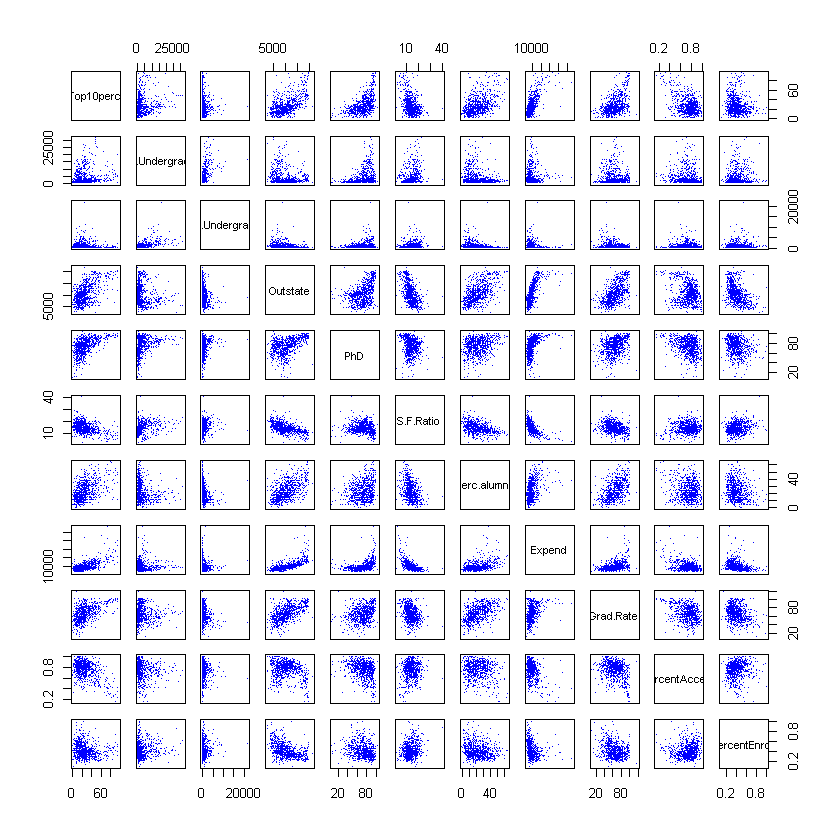

In [6]:
pairs(college[, -1], pch=".", col="blue") # tidak disarankan jika variabelnya banyak

* Private

In [7]:
library(ggplot2)

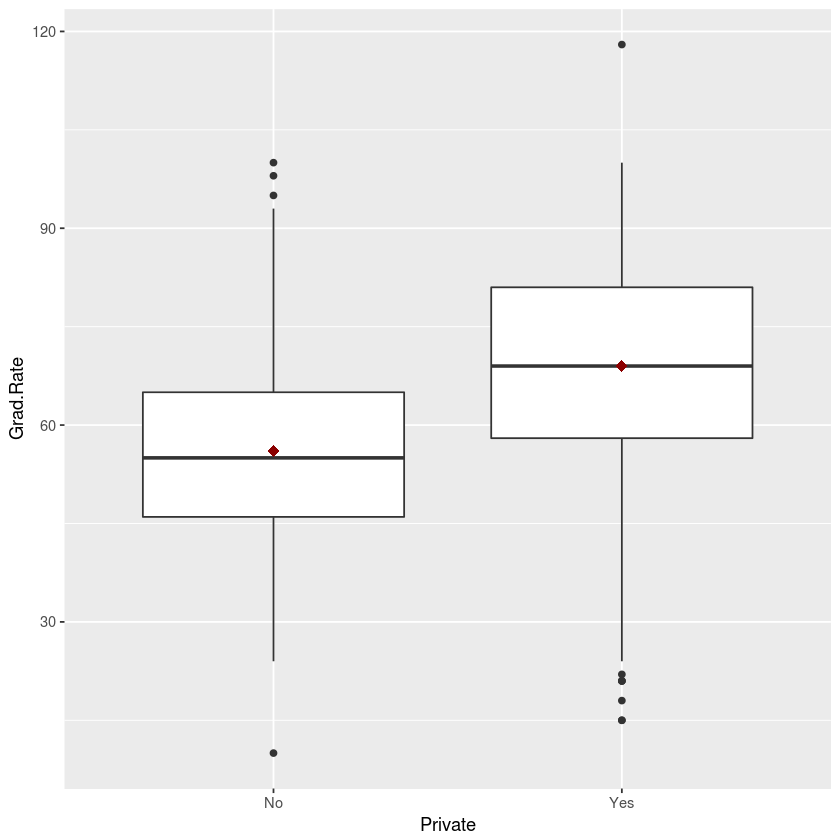

In [39]:
ggplot(college, aes(x=Private, y=Grad.Rate)) + geom_boxplot() +
    stat_summary(fun.y=mean, colour="darkred", geom="point", 
                           shape=18, size=3) # antara private dan publik berbeda`

In [10]:
college[college$Grad.Rate > 100,]$Grad.Rate <- 100

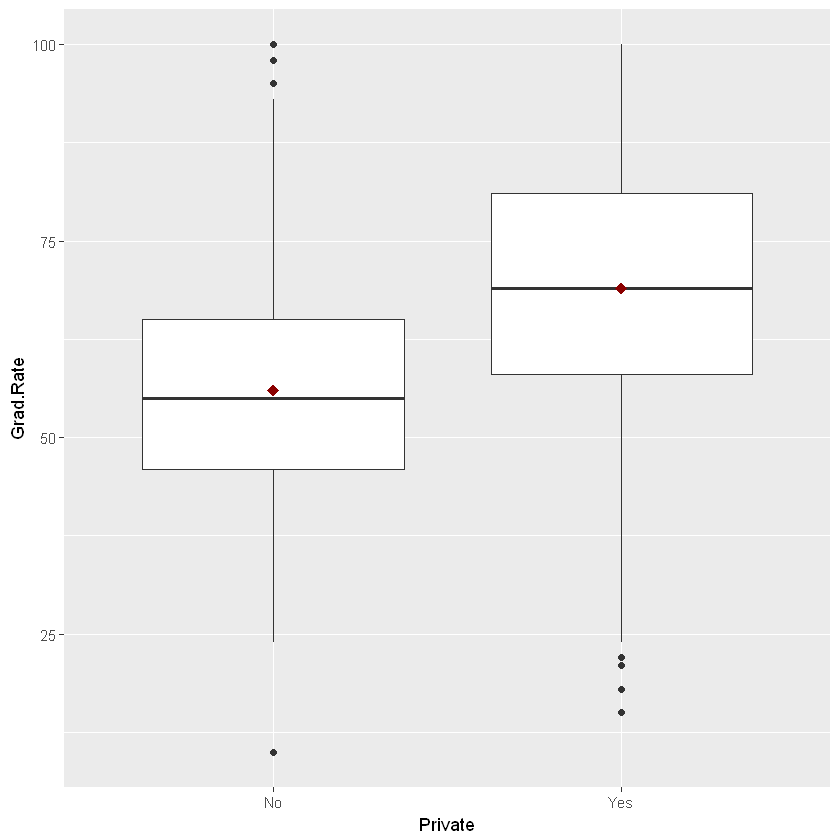

In [11]:
ggplot(college, aes(x=Private, y=Grad.Rate)) + geom_boxplot() +
    stat_summary(fun.y=mean, colour="darkred", geom="point", 
                           shape=18, size=3) # antara private dan publik berbeda`

* Top10perc

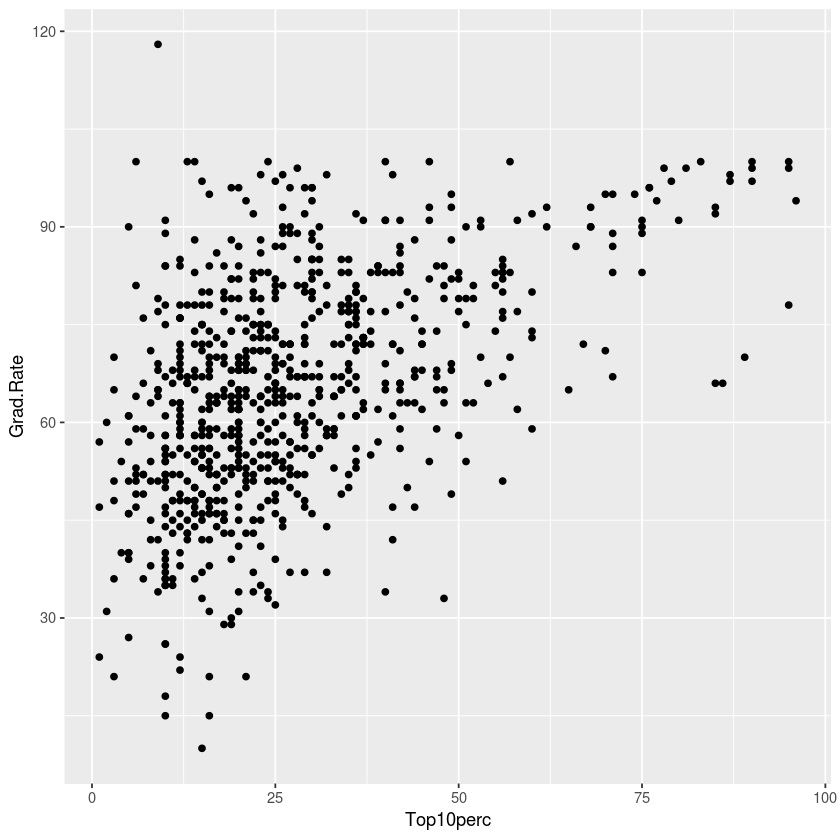

In [40]:
ggplot(college, aes(x=Top10perc, y=Grad.Rate)) + geom_point()

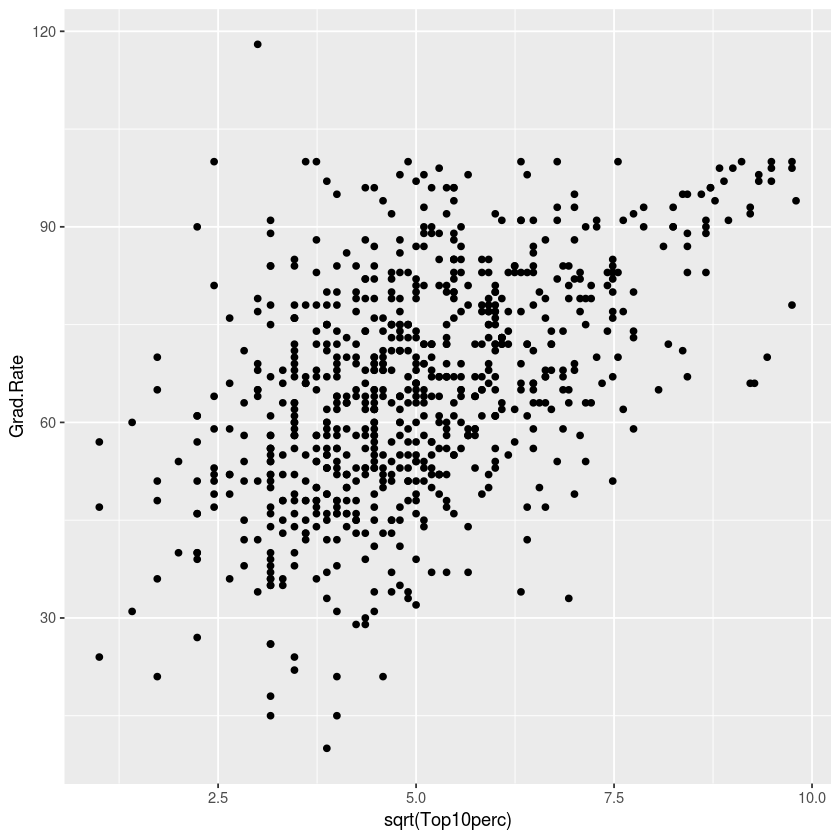

In [41]:
ggplot(college, aes(x=sqrt(Top10perc), y=Grad.Rate)) + geom_point()

In [63]:
college$Top10perc <- sqrt(college$Top10perc)

* Expend

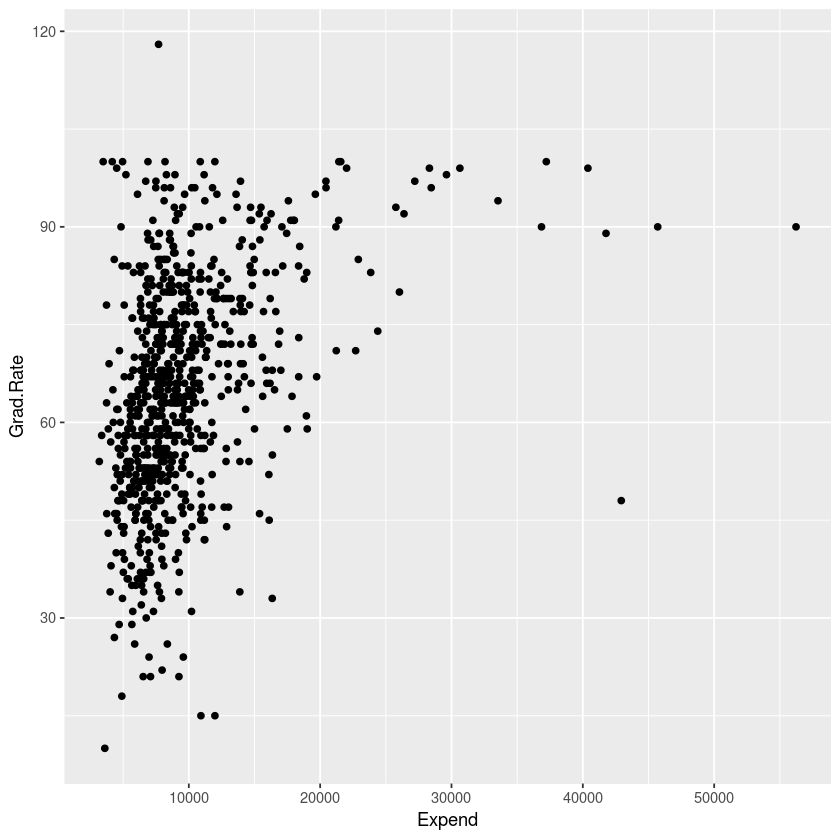

In [64]:
ggplot(college, aes(x=Expend, y=Grad.Rate)) + geom_point()

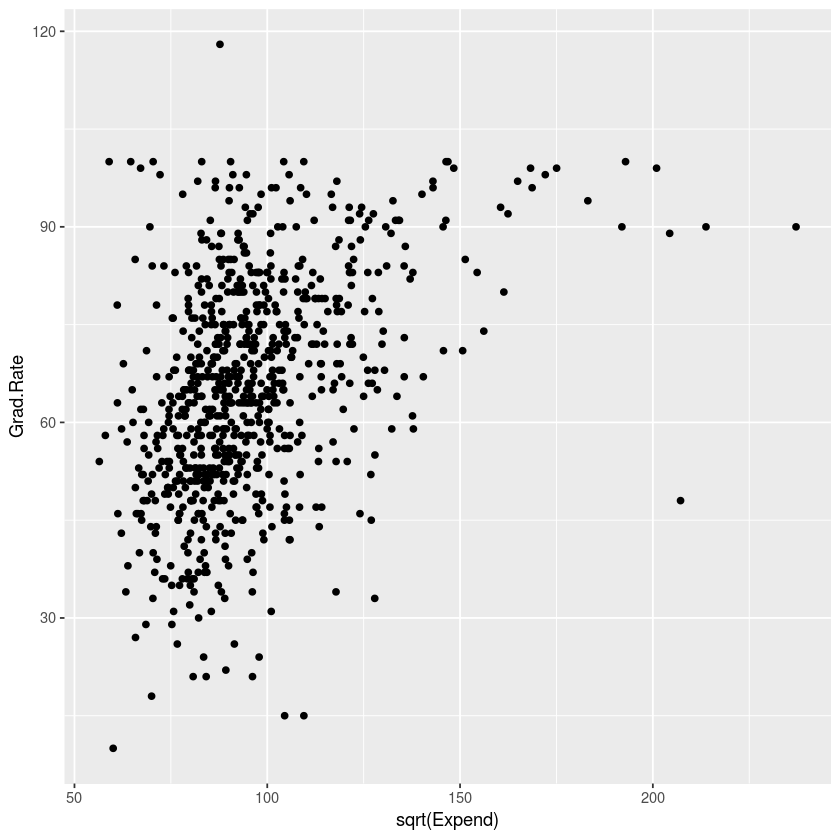

In [68]:
ggplot(college, aes(x=sqrt(Expend), y=Grad.Rate)) + geom_point()

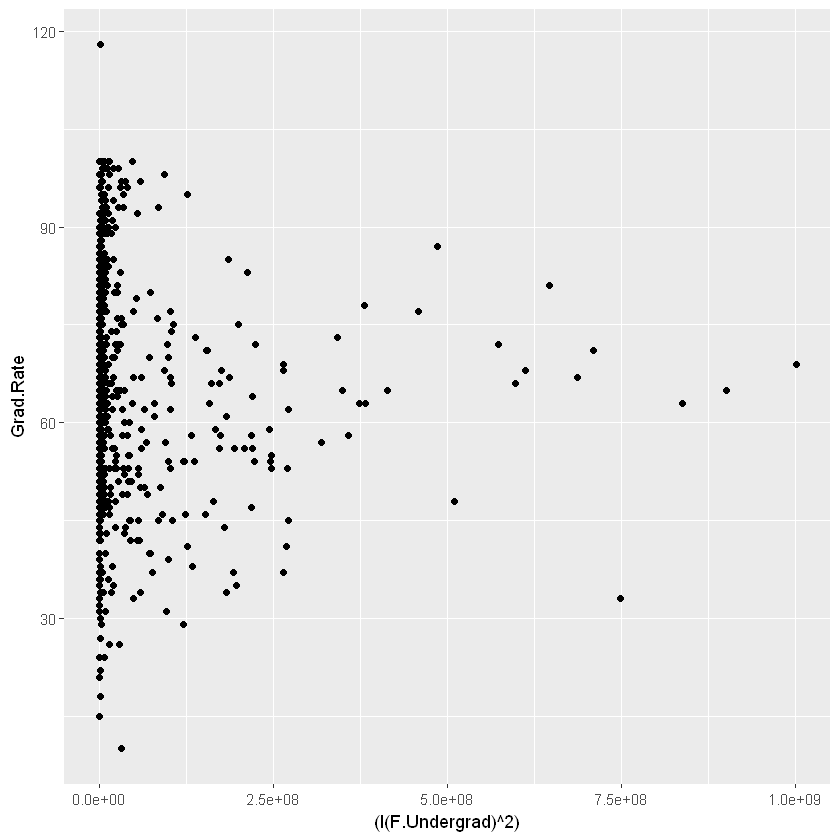

In [19]:
ggplot(college, aes(x=(I(F.Undergrad)^2), y=Grad.Rate)) + geom_point()

In [14]:
college$Expend <- sqrt(college$Expend)

Linear Model

In [15]:
model <- lm("Grad.Rate ~ .", data = college)
summary(model) # ada efek normalitas


Call:
lm(formula = "Grad.Rate ~ .", data = college)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.417  -7.334  -0.570   7.241  56.885 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    6.487e+01  6.683e+00   9.707  < 2e-16 ***
PrivateYes     4.686e+00  1.680e+00   2.789 0.005411 ** 
Top10perc      1.819e-01  4.257e-02   4.273 2.17e-05 ***
F.Undergrad    5.308e-04  1.446e-04   3.672 0.000258 ***
P.Undergrad   -1.758e-03  3.842e-04  -4.576 5.53e-06 ***
Outstate       1.468e-03  2.245e-04   6.540 1.13e-10 ***
PhD            6.507e-02  3.840e-02   1.695 0.090529 .  
S.F.Ratio     -5.349e-02  1.667e-01  -0.321 0.748364    
perc.alumni    2.744e-01  4.756e-02   5.769 1.16e-08 ***
Expend        -1.749e-01  4.092e-02  -4.273 2.17e-05 ***
PercentAccept -1.783e+01  3.720e+00  -4.793 1.97e-06 ***
PercentEnroll -9.178e+00  3.960e+00  -2.318 0.020723 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.7

In [16]:
model1 <- lm("Grad.Rate ~ . + I(F.Undergrad^2) + I(P.Undergrad^2)", data = college)
summary(model1) # datanya agar lebih terlihat


Call:
lm(formula = "Grad.Rate ~ . + I(F.Undergrad^2) + I(P.Undergrad^2)", 
    data = college)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.439  -7.466  -0.727   7.135  57.644 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       6.398e+01  6.686e+00   9.569  < 2e-16 ***
PrivateYes        6.421e+00  1.782e+00   3.604 0.000334 ***
Top10perc         1.749e-01  4.255e-02   4.110 4.39e-05 ***
F.Undergrad       1.537e-03  3.634e-04   4.229 2.63e-05 ***
P.Undergrad      -2.611e-03  7.160e-04  -3.647 0.000284 ***
Outstate          1.423e-03  2.243e-04   6.346 3.79e-10 ***
PhD               5.670e-02  3.847e-02   1.474 0.140937    
S.F.Ratio        -8.555e-02  1.663e-01  -0.514 0.607128    
perc.alumni       2.862e-01  4.860e-02   5.889 5.83e-09 ***
Expend           -1.862e-01  4.091e-02  -4.550 6.23e-06 ***
PercentAccept    -1.722e+01  3.714e+00  -4.637 4.15e-06 ***
PercentEnroll    -9.102e+00  3.941e+00  -2.309 0.021197 *  
I(F.Undergrad^2

In [17]:
colnames(model1$model)

[1] "Grad.Rate"        "Private"          "Top10perc"        "F.Undergrad"     
 [5] "P.Undergrad"      "Outstate"         "PhD"              "S.F.Ratio"       
 [9] "perc.alumni"      "Expend"           "PercentAccept"    "PercentEnroll"   
[13] "I(F.Undergrad^2)" "I(P.Undergrad^2)"

Bootstrap

In [18]:
library(boot)

In [19]:
coef.reg <- function(formula, data, indices) {
    d <- data[indices,] 
    fit <- lm(formula, data = d)
    return(fit$coefficients)
    } 

In [24]:
# bootstrapping with 1000 replications 
set.seed(1)
results <- boot(data = college, statistic = coef.reg, R = 1000,
                formula = Grad.Rate ~ . + I(F.Undergrad^2) + I(P.Undergrad^2))


In [25]:
results


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = college, statistic = coef.reg, R = 1000, formula = Grad.Rate ~ 
    . + I(F.Undergrad^2) + I(P.Undergrad^2))


Bootstrap Statistics :
          original        bias     std. error
t1*   6.398129e+01 -5.997261e-01 8.080919e+00
t2*   6.420641e+00  2.732174e-01 1.989914e+00
t3*   1.748678e-01 -3.537957e-04 4.237553e-02
t4*   1.536672e-03 -1.170926e-05 3.370254e-04
t5*  -2.611223e-03  4.539605e-04 1.148529e-03
t6*   1.423271e-03 -1.047418e-06 2.552238e-04
t7*   5.669626e-02  3.242146e-03 4.687961e-02
t8*  -8.555391e-02  2.845929e-03 1.967648e-01
t9*   2.861717e-01  3.410409e-03 5.741318e-02
t10* -1.861517e-01 -1.958831e-03 4.550327e-02
t11* -1.722338e+01 -1.243110e-01 4.205861e+00
t12* -9.101690e+00  4.628095e-01 4.989586e+00
t13* -3.940044e-08 -1.107098e-10 1.311067e-08
t14*  5.029313e-08 -6.903889e-08 1.376111e-07

In [91]:
colnames(results$t) <- names(results$t0)

In [103]:
for(i in 1:ncol(results$t)){
    print(names(results$t0)[i])
    print(quantile(results$t[, i], c(0.025, 0.975)))
}

[1] "(Intercept)"
    2.5%    97.5% 
43.74895 75.68883 
[1] "PrivateYes"
    2.5%    97.5% 
2.171072 9.974614 
[1] "Top10perc"
    2.5%    97.5% 
1.063574 2.912533 
[1] "F.Undergrad"
        2.5%        97.5% 
0.0008633323 0.0021682758 
[1] "P.Undergrad"
         2.5%         97.5% 
-0.0039822922  0.0005728597 
[1] "Outstate"
       2.5%       97.5% 
0.000957863 0.001966050 
[1] "PhD"
       2.5%       97.5% 
-0.05482031  0.13597876 
[1] "S.F.Ratio"
      2.5%      97.5% 
-0.4420005  0.3439884 
[1] "perc.alumni"
     2.5%     97.5% 
0.1750871 0.3991056 
[1] "Expend"
       2.5%       97.5% 
-0.26576927 -0.09512104 
[1] "PercentAccept"
     2.5%     97.5% 
-26.21317 -10.31632 
[1] "PercentEnroll"
      2.5%      97.5% 
-19.566251   1.021221 
[1] "I(F.Undergrad^2)"
         2.5%         97.5% 
-6.760515e-08 -1.579926e-08 
[1] "I(P.Undergrad^2)"
         2.5%         97.5% 
-3.820942e-07  1.156832e-07 


Lasso Regression

In [32]:
library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-5



In [104]:
library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-10



In [33]:
x = model.matrix(Grad.Rate ~ . + I(F.Undergrad^2) + I(P.Undergrad^2), college)[, -1]
y = college$Grad.Rate

In [34]:
grid = c(10000, 3000, 1000, 300, 100, 30, 10, 3, 1, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001, 0.0003, 0.0001)
lasso.mod = glmnet(x, y, alpha = 1, lambda = grid, standardize = TRUE)

In [35]:
lasso.mod


Call:  glmnet(x = x, y = y, alpha = 1, lambda = grid, standardize = TRUE) 

      Df   %Dev Lambda
 [1,]  0 0.0000  1e+04
 [2,]  0 0.0000  3e+03
 [3,]  0 0.0000  1e+03
 [4,]  0 0.0000  3e+02
 [5,]  0 0.0000  1e+02
 [6,]  0 0.0000  3e+01
 [7,]  0 0.0000  1e+01
 [8,]  3 0.3562  3e+00
 [9,]  6 0.4162  1e+00
[10,] 10 0.4465  3e-01
[11,] 11 0.4562  1e-01
[12,] 13 0.4595  3e-02
[13,] 13 0.4598  1e-02
[14,] 13 0.4598  3e-03
[15,] 13 0.4598  1e-03
[16,] 13 0.4598  3e-04
[17,] 13 0.4598  1e-04

K-Fold Cross Validation

In [36]:
set.seed(1)
lasso.cv = cv.glmnet(x, y, alpha = 1, lambda = grid, standardize = TRUE)
bestlam = lasso.cv$lambda.min

In [37]:
lasso.cv$cvm

[1] 293.5184 293.5184 293.5184 293.5184 293.5184 293.5184 293.4384 190.5514
 [9] 177.0748 176.9813 175.3706 175.1050 175.1755 175.2177 175.2146 175.2051

In [38]:
bestlam

[1] 0.03

In [39]:
lasso.best = glmnet(x, y, alpha = 1, lambda = bestlam, standardize = TRUE)

In [40]:
lasso.best$beta

13 x 1 sparse Matrix of class "dgCMatrix"
                            s0
PrivateYes        5.924941e+00
Top10perc         1.757662e-01
F.Undergrad       1.313573e-03
P.Undergrad      -2.334050e-03
Outstate          1.414223e-03
PhD               5.484005e-02
S.F.Ratio        -5.184538e-02
perc.alumni       2.842229e-01
Expend           -1.723662e-01
PercentAccept    -1.686965e+01
PercentEnroll    -9.028458e+00
I(F.Undergrad^2) -3.204572e-08
I(P.Undergrad^2)  3.494013e-08

In [41]:
x = model.matrix(Grad.Rate ~ . + I(F.Undergrad^2) + I(P.Undergrad^2), college)
y = college$Grad.Rate

In [42]:
grid = c(10000, 3000, 1000, 300, 100, 30, 10, 3, 1, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001, 0.0003, 0.0001)
lasso.mod = glmnet(x, y, alpha = 1, lambda = grid, standardize = TRUE)

In [43]:
lasso.mod


Call:  glmnet(x = x, y = y, alpha = 1, lambda = grid, standardize = TRUE) 

      Df   %Dev Lambda
 [1,]  0 0.0000  1e+04
 [2,]  0 0.0000  3e+03
 [3,]  0 0.0000  1e+03
 [4,]  0 0.0000  3e+02
 [5,]  0 0.0000  1e+02
 [6,]  0 0.0000  3e+01
 [7,]  0 0.0000  1e+01
 [8,]  3 0.3562  3e+00
 [9,]  6 0.4162  1e+00
[10,] 10 0.4465  3e-01
[11,] 11 0.4562  1e-01
[12,] 13 0.4595  3e-02
[13,] 13 0.4598  1e-02
[14,] 13 0.4598  3e-03
[15,] 13 0.4598  1e-03
[16,] 13 0.4598  3e-04
[17,] 13 0.4598  1e-04

In [44]:
set.seed(1)
lasso.cv = cv.glmnet(x, y, alpha = 1, lambda = grid, standardize = TRUE)
bestlam = lasso.cv$lambda.min

In [45]:
lasso.cv$cvm

[1] 293.5184 293.5184 293.5184 293.5184 293.5184 293.5184 293.4384 190.5514
 [9] 177.0748 176.9813 175.3706 175.1050 175.1755 175.2177 175.2146 175.2051

In [46]:
bestlam

[1] 0.03

In [47]:
lasso.best = glmnet(x, y, alpha = 1, lambda = bestlam, standardize = TRUE)

In [48]:
lasso.best$beta

14 x 1 sparse Matrix of class "dgCMatrix"
                            s0
(Intercept)       .           
PrivateYes        5.924941e+00
Top10perc         1.757662e-01
F.Undergrad       1.313573e-03
P.Undergrad      -2.334050e-03
Outstate          1.414223e-03
PhD               5.484005e-02
S.F.Ratio        -5.184538e-02
perc.alumni       2.842229e-01
Expend           -1.723662e-01
PercentAccept    -1.686965e+01
PercentEnroll    -9.028458e+00
I(F.Undergrad^2) -3.204572e-08
I(P.Undergrad^2)  3.494013e-08

In [52]:
lasso.best$a0

s0 
62.86203

In [54]:
coef(lasso.best)

15 x 1 sparse Matrix of class "dgCMatrix"
                            s0
(Intercept)       6.286203e+01
(Intercept)       .           
PrivateYes        5.924941e+00
Top10perc         1.757662e-01
F.Undergrad       1.313573e-03
P.Undergrad      -2.334050e-03
Outstate          1.414223e-03
PhD               5.484005e-02
S.F.Ratio        -5.184538e-02
perc.alumni       2.842229e-01
Expend           -1.723662e-01
PercentAccept    -1.686965e+01
PercentEnroll    -9.028458e+00
I(F.Undergrad^2) -3.204572e-08
I(P.Undergrad^2)  3.494013e-08

In [50]:
summary(model)


Call:
lm(formula = "Grad.Rate ~ .", data = college)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.417  -7.334  -0.570   7.241  56.885 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    6.487e+01  6.683e+00   9.707  < 2e-16 ***
PrivateYes     4.686e+00  1.680e+00   2.789 0.005411 ** 
Top10perc      1.819e-01  4.257e-02   4.273 2.17e-05 ***
F.Undergrad    5.308e-04  1.446e-04   3.672 0.000258 ***
P.Undergrad   -1.758e-03  3.842e-04  -4.576 5.53e-06 ***
Outstate       1.468e-03  2.245e-04   6.540 1.13e-10 ***
PhD            6.507e-02  3.840e-02   1.695 0.090529 .  
S.F.Ratio     -5.349e-02  1.667e-01  -0.321 0.748364    
perc.alumni    2.744e-01  4.756e-02   5.769 1.16e-08 ***
Expend        -1.749e-01  4.092e-02  -4.273 2.17e-05 ***
PercentAccept -1.783e+01  3.720e+00  -4.793 1.97e-06 ***
PercentEnroll -9.178e+00  3.960e+00  -2.318 0.020723 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.7